# Taller numpy

In [1]:
import numpy as np

## Resolviendo sistemas de ecuaciones lineales con numpy

De acuerdo a [1](#Referencias), una **ecuación lineal** sobre las variables $x_1 \ldots x_n$ es una ecuación que puede ser escrita de la siguiente forma:

\begin{equation*}
a_1 x_1 + a_2 x_2 + \ldots + a_n x_n = b
\end{equation*}

donde $b$ y los coeficientes $a_1 \ldots a_n$ son números reales o complejos, que usualmente se conocen de antemano.

Por otro lado, un **sistema de ecuaciones lineales** (o **sistema lineal**) es una colección de una o más ecuaciones lineales que involucren las mismas variables, por ejemplo, $x_1 \ldots x_n$. A continuación se presenta un sistema de 2 ecuaciones y 3 variables:

\begin{align}
2x_1 - x_2 + 1.5 x_3 = 8 \\
x_1 - 4 x_3 = -7
\end{align}

Una solución al sistema es una lista de valores $(s_1 \ldots s_n)$ que al ser reemplazados por $x_1 \ldots x_n$ respectivamente, hacen verdadera cada ecuación. Por ejemplo, $(5, 6.5, 3)$ es una solución al sistema presentado anteriormente, porque cuando estos valores son reemplazados por $x_1, x_2, x_3$ respectivamente, las ecuaciones se simplifican a $8=8$ y a $-7=-7$

Para el caso concreto de un sistema de dos ecuaciones con dos incógnitas, se puede encontrar de forma sencilla la solución. El problema se reduce a encontrar la intersección de las líneas que cada ecuación representa. Tome el siguiente sistema:

\begin{align}
x_1 - 2x_2 = -1 \\
-x_1 + 3x_2 = 3
\end{align}

Cada ecuación será nombrada $l_1$ y $l_2$. Una solución a este sistema consiste en un punto $(x_1, x_2)$ que recae en ambas líneas $l_1$ y $l_2$. A continuación, observamos que el punto $(3, 2)$ satisface esta condición.

In [2]:
import matplotlib.pyplot as plt  

%matplotlib inline

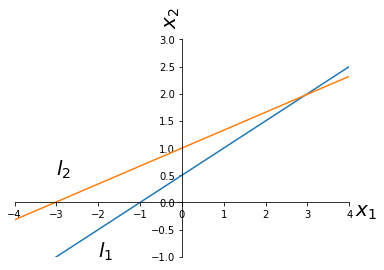

In [3]:
A1, B1 = 0.5, 0.5 # Resultado de expresar cada ecuación de la forma x_1 = a_1*x_1 + b_1
A2, B2 = 0.33, 1. # Resultado de expresar cada ecuación de la forma x_2 = a_2*x_2 + b_2

x = np.linspace(-5.,5.)

fig,ax = plt.subplots()
ax.plot(x,A1*x+B1)
ax.plot(x,A2*x+B2)

ax.set_xlim((-4.,4.))
ax.set_ylim((-1.,3.))

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xlabel(r'$x_1$', fontsize = 20)
ax.xaxis.set_label_coords(1.05, 0.25)
ax.set_ylabel(r'$x_2$', fontsize = 20)
ax.yaxis.set_label_coords(0.5, 1.10)

plt.text(-3, .5, r'$l_2$', fontsize=20)
plt.text(-2, -1, r'$l_1$', fontsize=20)

plt.show()

Sin embargo, también se debe considerar el caso, cuando las lineas son paralelas. Como en el caso del sistema:

\begin{align}
x_1 - 2x_2 = -1 \\
-x_1 + 2x_2 = 3
\end{align}


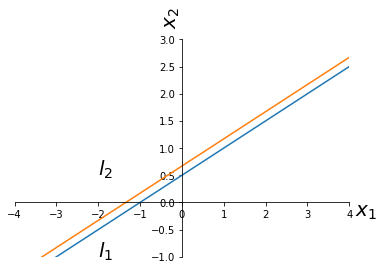

In [4]:
A1,B1 = 0.5,0.5 # Resultado de expresar cada ecuación de la forma x_1 = a_1*x_1 + b_1
A2,B2 = 0.5,0.67 # Resultado de expresar cada ecuación de la forma x_2 = a_2*x_2 + b_2

x = np.linspace(-5.,5.)

fig,ax = plt.subplots()
ax.plot(x,A1*x+B1)
ax.plot(x,A2*x+B2)

ax.set_xlim((-4.,4.))
ax.set_ylim((-1.,3.))

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xlabel(r'$x_1$', fontsize = 20)
ax.xaxis.set_label_coords(1.05, 0.25)
ax.set_ylabel(r'$x_2$', fontsize = 20)
ax.yaxis.set_label_coords(0.5, 1.10)

plt.text(-2, .5, r'$l_2$', fontsize=20)
plt.text(-2, -1, r'$l_1$', fontsize=20)

plt.show()

En este caso, el sistema no tiene solución. 

### Usando numpy.linalg.solve

Numpy provee una forma rápida y efectiva para resolver sistemas de ecuaciones usando el módulo [`numpy.linalg.solve`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.solve.html). El cual puede ser utilizado de la siguiente manera:

```python
> x = np.linalg.solve(A, b)
> print x
array([3., 2.])
> np.allclose(np.dot(A, x), b)
True
```

$x$ contiene la solución encontrada. Como herramienta de verificación, se puede comprobar si la solución es correcta usando `np.allclose`. Este módulo evalua si dos arreglos son iguales, elemento a elemento. Esta igualdad la comprueba en un rango de tolerancia numérica.

Donde $A$ consiste en una matriz que corresponde a los coeficientes $a_1 \ldots a_n$ de cada ecuación. Dicha matriz debe cumplir dos condiciones para que usar `numpy.linalg.solve`. La primera consiste en que la matriz debe ser cuadrada, es decir, es de tamaño $n \times n$ ($n$ variables, $n$ ecuaciones). Además, debe ser una matriz **invertible** (**no singular**). En caso de que la matriz no sea invertible, numpy generará un error, como se podrá verificar más adelante. $b$ corresponderá a un arreglo de tamaño $n$, que alberga los valores dependientes $b$ en el mismo orden de las ecuaciones.

Para los siguientes sistemas de ecuaciones, cree un arreglo de numpy de coeficientes $A$ y un arreglo $b$, luego resuelva el sistema usando `numpy.linalg.solve`. Verifique si la solución es correcta usando `np.allclose`. En caso de que reporte un error a nivel de numpy, explique la naturaleza del error.

1. 
\begin{align}
x_1 - 2x_2 = -1 \\
-x_1 + 3x_2 = 3
\end{align}
2. 
\begin{align}
x_1 - 2x_2 = -1 \\
-x_1 + 2x_2 = 3
\end{align}
3. 
\begin{align}
5x_1 - 1x_2 + 2x_3 = 7 \\
-2x_1 + 6x_2 + 9x_3 = 0 \\
-7x_1 + 5x_2 - 3x_3 = -7 \\
\end{align}
4. 
\begin{align}
x_1 - 3x_3 = 8 \\
2x_1 + 2x_2 + 9x_3 = 7 \\
x_2 + 5x_3 = -2 \\
\end{align}

**SOLUCIÓN**

In [ ]:
# EJECUTE SU CÓDIGO AQUÍ

In [5]:
# NO MODIFIQUE ESTA CELDA

[3. 2.]
True


In [ ]:
# EJECUTE SU CÓDIGO AQUÍ

In [6]:
# NO MODIFIQUE ESTA CELDA

LinAlgError: Singular matrix

In [ ]:
# EJECUTE SU CÓDIGO AQUÍ

In [7]:
# NO MODIFIQUE ESTA CELDA

[ 1.61538462  0.76923077 -0.15384615]
True


In [ ]:
# EJECUTE SU CÓDIGO AQUÍ

In [8]:
# NO MODIFIQUE ESTA CELDA

[ 5.  3. -1.]
True


## Centrado de datos usando numpy

La estandarización de conjuntos de datos es un requerimiento muy común entre los estimadores de aprendizaje de máquina [2](#Referencias). El centrado de datos consiste en remover la media del conjunto de datos, por cada característica. Uno de los estimadores que se benefecia del efecto de remover la media, es PCA [3](#Referencias). Usualmente el centrado de datos es acompañado por un escalamiento, que se logra al dividir cada dato entre la desviación estándar por cada característica. Esto es muy útil para evitar que los estimadores aprendan más de una característica que de otra.

A continuación se provee una función de visualización básica, la cual permite visualizar unos datos generados aleatoriamente. El ejercicio consiste en centrar los datos y representarlos de tal forma que se verifique que están centrados.

In [5]:
import itertools
np.random.seed(2018)

def plot_scatter(x, y, label_x, label_y):
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    
    plt.scatter(x, y, alpha=0.5)
    plt.show()

En la siguiente celda, se generaran los datos de $50$ individuos de forma aleatoria. Los datos corresponderan a la edad (entre $25$ y $35$ años) y a la altura (entre $160$ y $185$ cm)

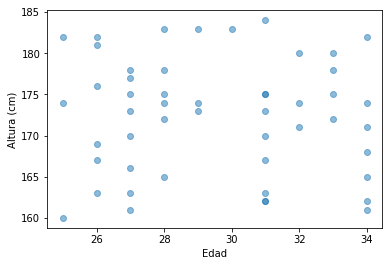

In [25]:
#np.random.seed(2018)

N = 50
age = np.random.randint(25, 35, N)
height = np.random.randint(160, 185, N)

X = np.array([age, height]).transpose()
#print(X)

#print(X[:, 0])
plot_scatter(X[:, 0], X[:, 1], 'Edad', 'Altura (cm)')

In [24]:
print(X.shape)

(50, 2)


**SOLUCIÓN**

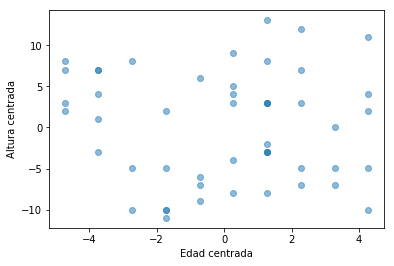

In [14]:
# NO MODIFIQUE ESTA CELDA

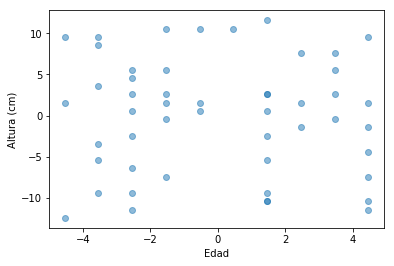

In [31]:
# EJECUTE SU CÓDIGO AQUÍ

# Encuentre la media por característica
meanX=X.mean(axis=0)

# Reste la media de los datos
X_centered=X-meanX

# Use plot_scatter para visualizar los datos centrados (X_centered).

plot_scatter(X_centered[:, 0], X_centered[:, 1], 'Edad', 'Altura (cm)')

Visualice ambos datos, tanto los originales como los centrados en el mismo scatter plot.

In [15]:
# EJECUTE SU CÓDIGO AQUÍ

# Concatene X y X_centered

# Use plot_scatter para visualizar los datos centrados (X_centered).

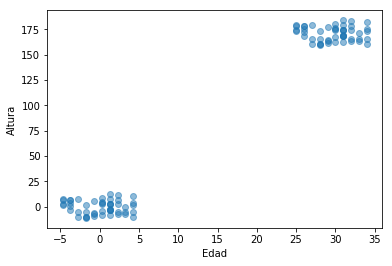

In [16]:
# NO MODIFIQUE ESTA CELDA

## Referencias

1. Lay, David C. Linear Algebra and its applications, 1997.
2. Preprocesamiento usando Scikit-Learn: http://scikit-learn.org/stable/modules/preprocessing.html
3. Efecto del centrado de datos en PCA: https://stats.stackexchange.com/questions/189822/how-does-centering-make-a-difference-in-pca-for-svd-and-eigen-decomposition